In [ ]:
!pip install river==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 846.0/846.0 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for river: filename=river-0.7.0-cp310-cp310-linux_x86_64.whl size=2361401 sha256=78332bd5d5d9a2015acf45aee9228292f258e33dd3723ccafe1ebdb776ed5ecc
  Stored in directory: /root/.cache/pip/wheels/71/e9/7e/105173d51ebb5262f6f2dc4f6a5003ec86365255e8fd989733
Successfully built river


In [ ]:
!pip install memory-profiler

In [ ]:
!pip install optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 45.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=2ae5950945bc25f4d7bcd7a247068ef9599a53227f480608acd078287b446713
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built optunity


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from river import metrics
from river import stream
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic/tfidf_embeddings.csv")
data

,00pm,10a,10th,125th,12pm,145th,14th,16th,180th,19th,...,yes,yet,york,you,youd,your,youre,youth,zone,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,2
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184964,0.0,0.200696,0.0,0.0,0.0,0


In [ ]:
X = data.drop(['class'],axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.43, test_size = 0.57, shuffle=False, random_state = 0)

In [ ]:
X_test

,00pm,10a,10th,125th,12pm,145th,14th,16th,180th,19th,...,years,yes,yet,york,you,youd,your,youre,youth,zone
1290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.184964,0.0,0.200696,0.0,0.0,0.0


In [ ]:
%%time
import memory_profiler as mem_profile
m1 = mem_profile.memory_usage()
print('Memory (Before): ' + str(m1[0]) + ' MB' )

classifier = lgb.LGBMClassifier(verbose=-1)
# classifier = joblib.load('Optimized_lightGBM.pkl')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_test,predictions)))

m2 = mem_profile.memory_usage()
print('Memory (After) : ' + str(m2[0]) + ' MB')
print('Memory Consumption : ' + str(m2[0]-m1[0]) + ' MB')

Memory (Before): 626.26171875 MB
Accuracy: 0.9233918128654971
Memory (After) : 629.859375 MB
Memory Consumption : 3.59765625 MB
CPU times: user 777 ms, sys: 28.5 ms, total: 806 ms
Wall time: 2.92 s


In [ ]:
import time
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# a: warining threshold, b: drift threshold, win1: sliding window size, win2: adaptive window max size
def oasw_bo(params):

    a=abs(float(params['a']))
    b=abs(float(params['b']))
    win1=int(params['win1'])
    win2=int(params['win2'])

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1710,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)

        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return {'loss': -score, 'status': STATUS_OK }

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space = {
    'a': hp.quniform('a', 0.95, 0.99, 0.001),
    'b': hp.quniform('b', 0.90, 0.98, 0.001),
    'win1': hp.quniform('win1', 200, 1000, 50),
    'win2': hp.quniform('win2', 1000, 3000, 100),
}

t1=time.time()
best = fmin(fn=oasw_bo,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("Hyperopt estimated optimum {}".format(best))
t2=time.time()
print(t2-t1)

0.97 0.976 250 1200 0.9077519379844962
0.966 0.905 200 1500 0.9209302325581395
0.9540000000000001 0.911 550 1300 0.9209302325581395
0.97 0.9470000000000001 450 2300 0.9209302325581395
0.96 0.9590000000000001 450 1200 0.9209302325581395
0.9510000000000001 0.9390000000000001 400 2100 0.9209302325581395
0.972 0.917 500 2900 0.9209302325581395
0.973 0.915 850 2500 0.9209302325581395
0.971 0.9490000000000001 600 2300 0.9209302325581395
0.971 0.9570000000000001 700 2700 0.9209302325581395
100%|██████████| 10/10 [00:33<00:00,  3.30s/trial, best loss: -0.9209302325581395]
Hyperopt estimated optimum {'a': 0.966, 'b': 0.905, 'win1': 200.0, 'win2': 1500.0}
33.064481019973755


In [ ]:
def oasw(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    i=0
    yt = []
    yp = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]

    metric = metrics.Accuracy()

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    for j in range(1710,3000):

        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric

        # Store the y_test, y_pred, and x_test
        yt.append(yi)
        yp.append(y_pred)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                    else:
                        classifier.fit(x_new,y_new)
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)
            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1
    score=metric.get()
    print(str(a)+" "+str(b)+" "+str(win1)+" "+str(win2)+" "+str(score)) # Output the hyperparameter values and corresponding accuracy
    return score

In [ ]:
import optunity
import optunity.metrics

search = {
    'a': [0.95,0.99],
    'b': [0.90,0.98],
    'win1': [200,1000],
    'win2': [1000,5000],
         }

optimal_configuration, info, _ = optunity.maximize(oasw,
                                                  solver_name='particle swarm',
                                                  num_evals=10,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

0.99 0.91 750 2908 0.9209302325581395
0.97 0.95 350 4908 0.9209302325581395
0.965 0.92 850 1408 0.9209302325581395
0.985 0.96 450 3408 0.9209302325581395
0.975 0.94 250 2408 0.9209302325581395
0.955 0.98 650 4408 0.9209302325581395
0.954 0.937 975 4533 0.9209302325581395
0.974 0.977 575 2533 0.9209302325581395
0.984 0.917 375 3533 0.9209302325581395
0.964 0.957 775 1533 0.9209302325581395
{'a': 0.98982421875, 'b': 0.9096484375, 'win1': 750.390625, 'win2': 2908.203125}
Accuracy:0.9209302325581395


In [ ]:
# Define OASW with a figure
def oasw_plot(a=0.99, b=0.95, win1=200, win2=1000):
    a = round(a, 3)
    b = round(b, 3)
    win1 = round(win1)
    win2 = round(win2)

    metric = metrics.Accuracy()
    metric2 = metrics.Accuracy()

    i = 0
    t = []
    yt = []
    yp = []
    m = []
    m2 = []
    x_new=[]
    y_new=[]
    dr=[0]
    d=0
    f=0
    tt=0
    th=0
    xt=[]
    dri = [0]
    mt = 0

    classifier = lgb.LGBMClassifier(verbose=-1) # Train the initial LightGBM model
    classifier.fit(X_train,y_train)

    classifier2 = lgb.LGBMClassifier(verbose=-1) # Train an offline LightGBM model as a comparison model
    classifier2.fit(X_train,y_train)

    for j in range(1710,3000):
        xi = X_test.loc[j]
        yi = y_test[j]
        xi2= np.array(xi)

        y_pred = classifier.predict(xi2.reshape(1, -1))      # make a prediction
        #print(yi)
        #print(y_pred[0])
        metric = metric.update(yi, y_pred[0])  # update the metric


        y_pred2= classifier2.predict(xi2.reshape(1, -1))
        metric2 = metric2.update(yi, y_pred2[0])

        # Store the y_test, y_pred, x_test, and real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        m2.append(metric2.get()*100)
        xt.append(xi2)

        # Monitor the accuracy changes in the sliding window
        if i>2*win1:
            acc1=accuracy_score(yt[i-win1:],yp[i-win1:]) # Current window accuracy
            acc2=accuracy_score(yt[i-2*win1:i-win1],yp[i-2*win1:i-win1]) # Last window accuracy
            if (d==0)&(acc1<a*acc2): # If the window accuracy drops to the warning level
                x_new.append(xi2)
                y_new.append(yi)
                d=1
            if d==1: # In the warning level
                tt=len(y_new)
                if acc1<b*acc2: # If the window accuracy drops to the drift level
                    dr.append(i)# Record the drift start point
                    dri.append(i)
                    f=i
                    if tt<win1: # if enough new concept samples are collected
                        classifier.fit(xt[i-win1:],yt[i-win1:])
                        mt+=1
                    else:
                        classifier.fit(x_new,y_new)
                        mt+=1
                    d=2
                elif (acc1>a*acc2)|(tt==win2): # If the window accuracy increases back to the normal level (false alarm)
                    x_new=[]
                    y_new=[]
                    d=0
                else:
                    x_new.append(xi2)
                    y_new.append(yi)

            if d==2: # In the drift level
                tt=len(y_new)
                acc3=accuracy_score(yt[f:f+win1],yp[f:f+win1])
                x_new.append(xi2)
                y_new.append(yi)
                if tt>=win1:
                    if (acc1<a*acc3): # When new concept accuracy drops to the warning level
                        if th==0:
                            classifier.fit(x_new,y_new) # Retrain the classifier on all the newly collected samples to obtain a robust classifier
                            mt+=1
                            th=1
                    if (th==1)&(tt==win2): # When sufficient new concept samples are collected
                        classifier.fit(x_new,y_new) #obtain a robust classifier
                        mt+=1
                        x_new=[]
                        y_new=[]
                        d=0 # Go back to the normal state for next potential drift detection
                        th=0

        i=i+1

    # Plot the accuracy change figure
    plt.rcParams.update({'font.size': 35})
    plt.ion()
    plt.figure(1,figsize=(24,15))
    sns.set_style("darkgrid")
    plt.clf()
    plt.plot(t,m,'-b',label='ASW+LightGBM, Avg Accuracy: %.2f%%'%(metric.get()*100))
    plt.plot(t,m2,'red',label='Offline LightGBM, Avg Avg Accuracy: %.2f%%'%(metric2.get()*100))

    #Plot the drift points
    for i in range(len(dr)):
        if i!=0:
            plt.scatter(dr[i],m[dr[i]],s=200,c='r')

    plt.legend(loc='best')
    plt.ylim(10,100)
    #plt.title('NSL-KDD', fontsize=40)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy(%)')

    plt.draw()
    print(dri)
    print(dr)
    print(mt)

[0]
[0]
0


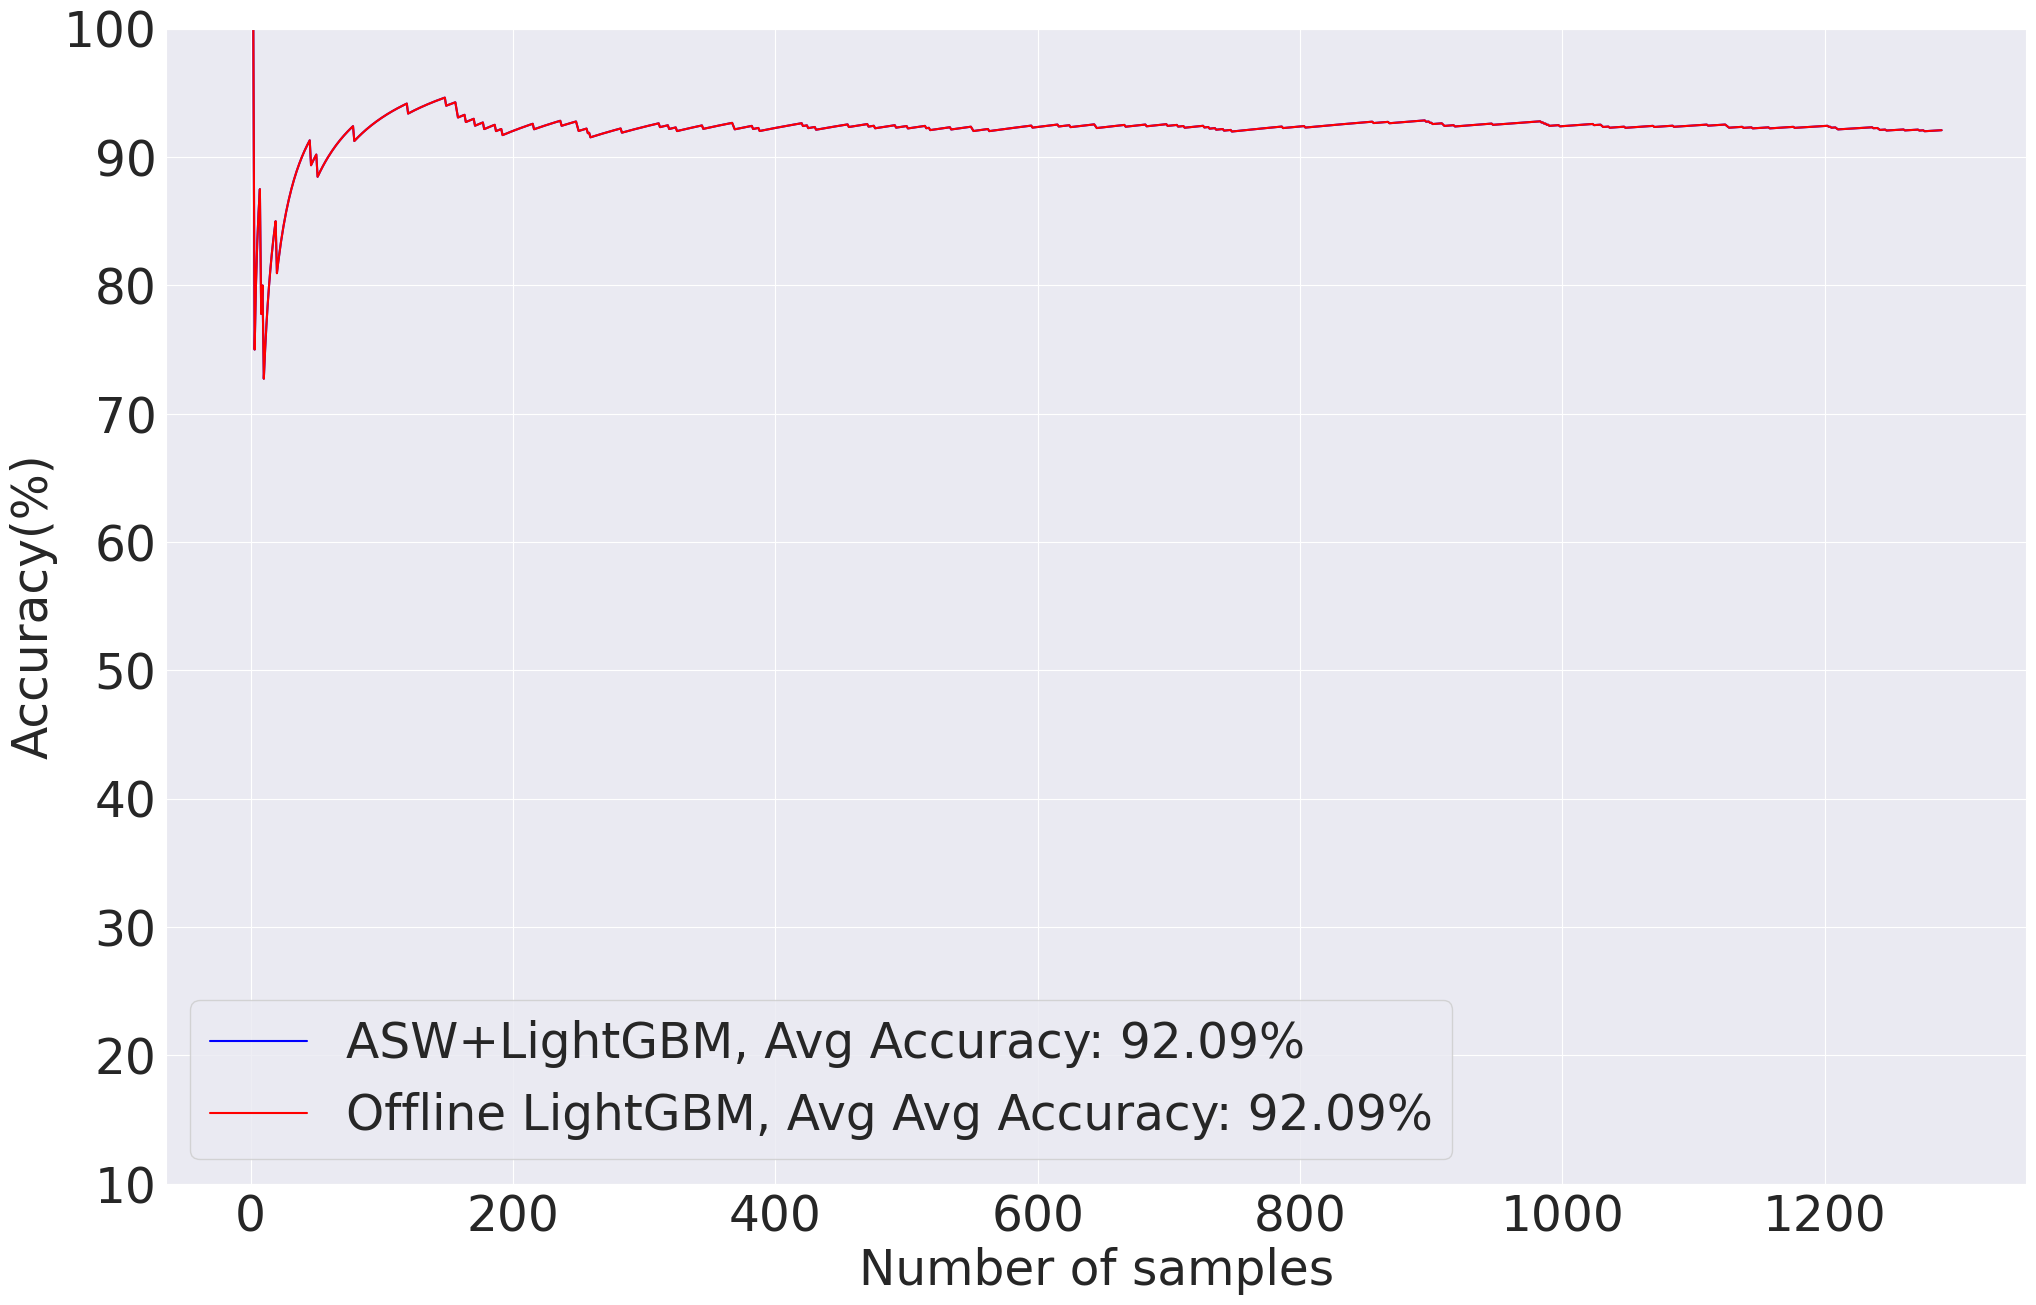

In [ ]:
oasw_plot(a =0.9613867187499999, b= 0.9527734375, win1= 256.640625, win2= 3064.453125)

[0]
[0]
0


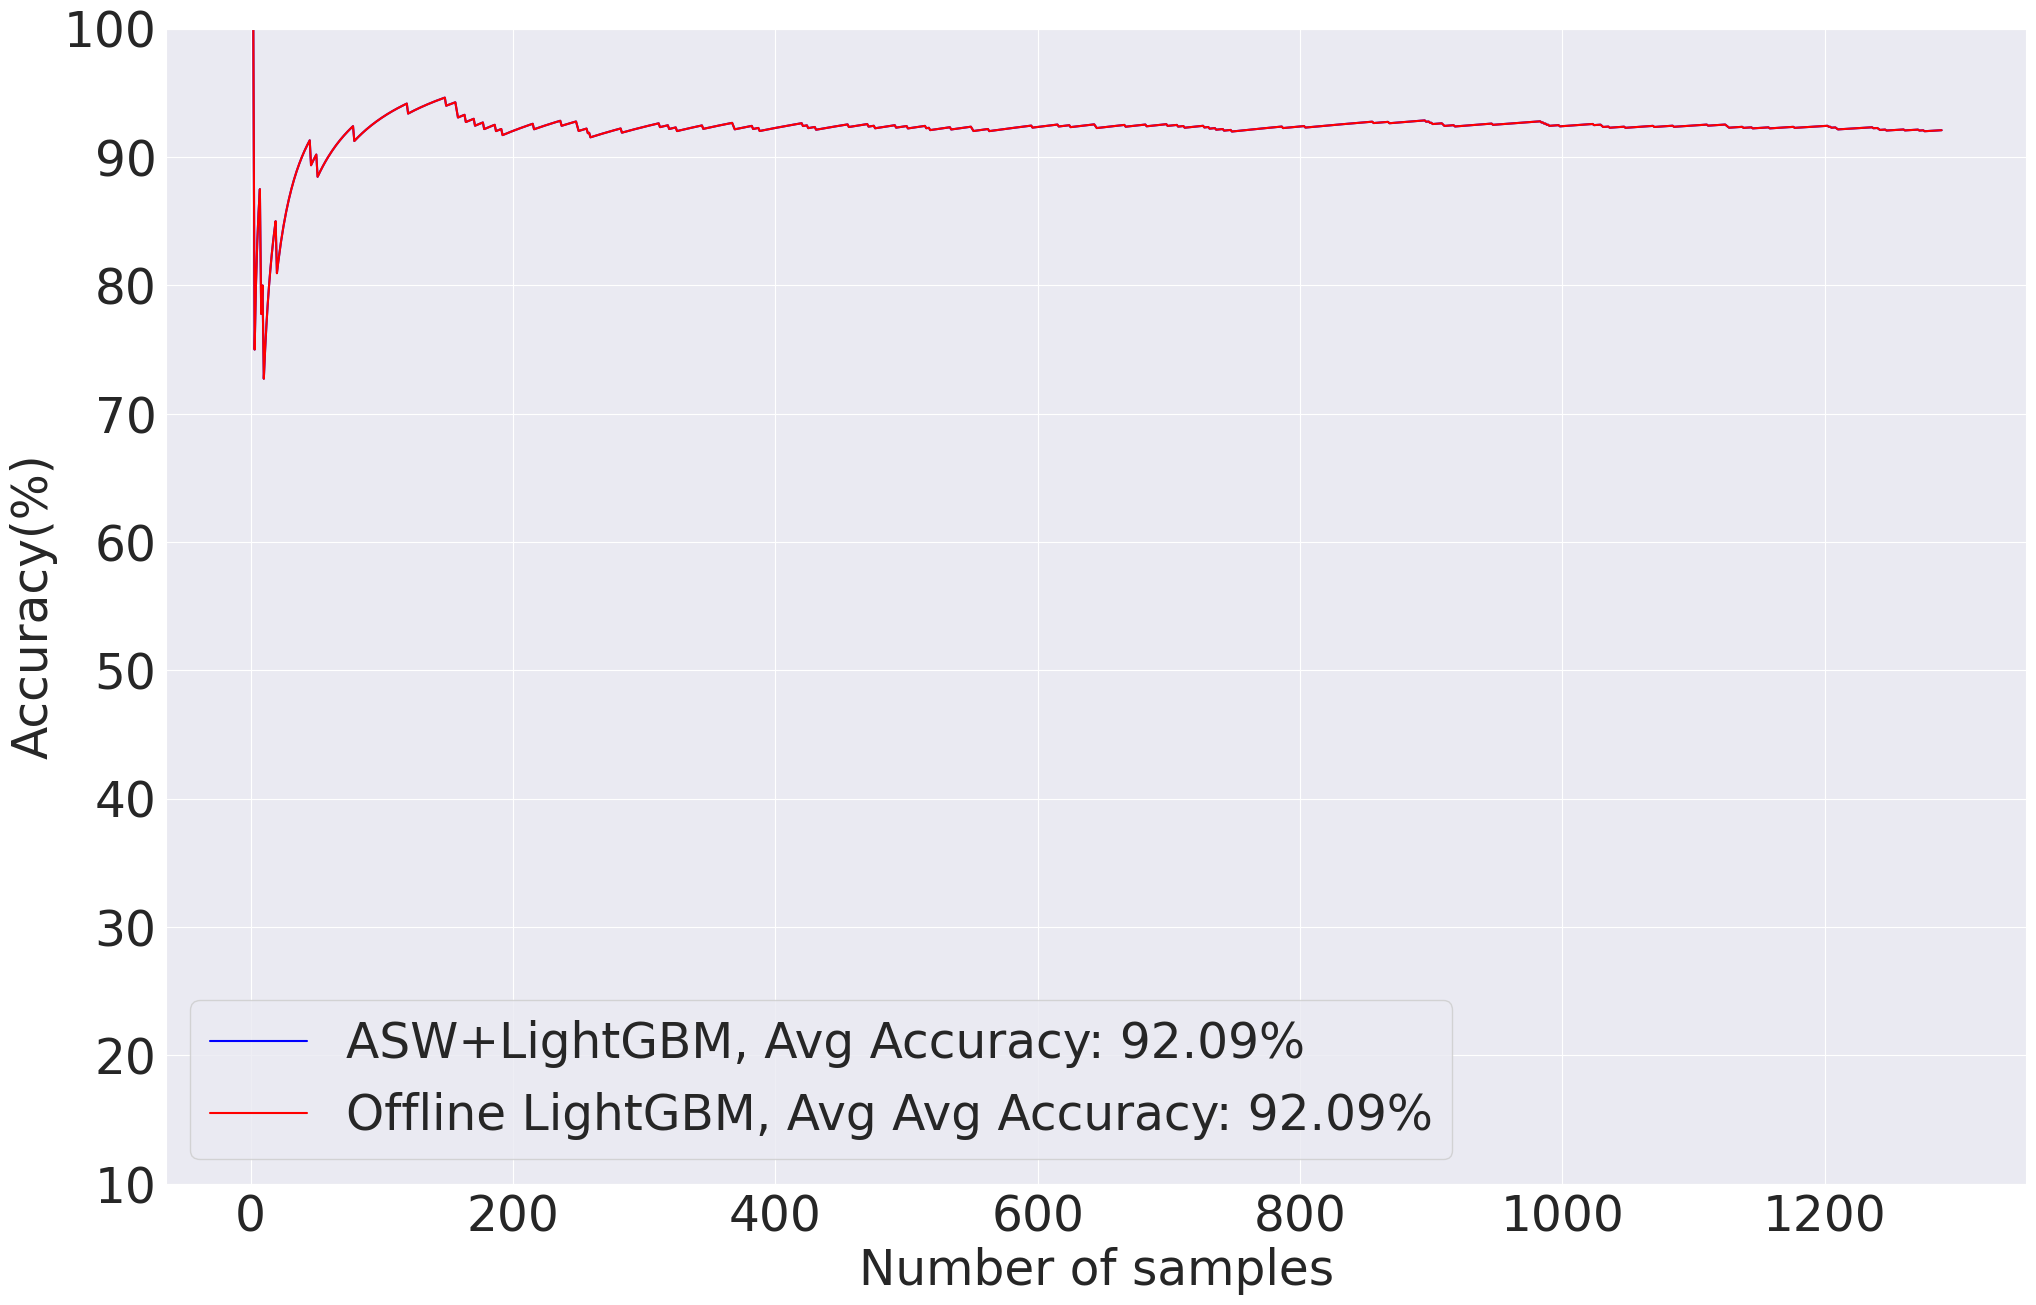

In [ ]:
oasw_plot(a= 0.971, b= 0.9520000000000001, win1= 550.0, win2= 2300.0)

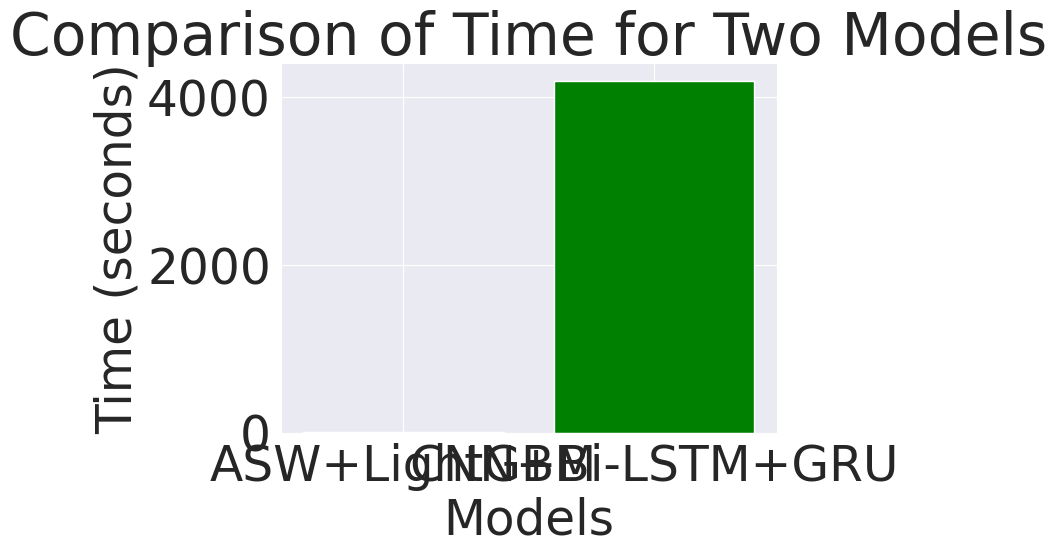

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Time values
time_values = [timedelta(seconds=11), timedelta(hours=1, minutes=10)]

# Convert time values to seconds for plotting
time_seconds = [time.total_seconds() for time in time_values]

# Names for the modes
modes = ['ASW+LightGBM','CNN+Bi-LSTM+GRU']

# Bar plot
plt.bar(modes, time_seconds, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.xlabel('Models')
plt.title('Comparison of Time for Two Models')
plt.
plt.show()



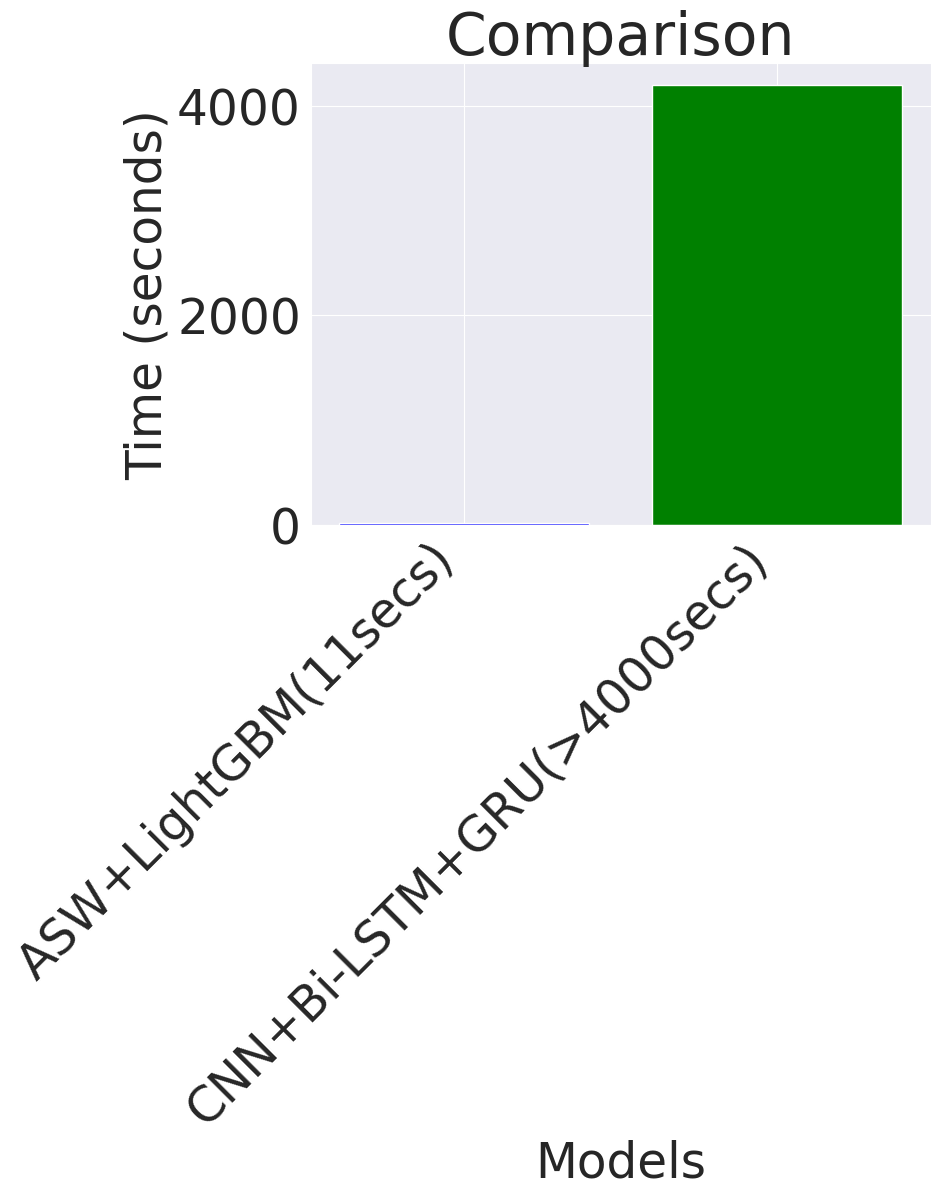

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

# Time values
time_values = [timedelta(seconds=11), timedelta(hours=1, minutes=10)]

# Convert time values to seconds for plotting
time_seconds = [time.total_seconds() for time in time_values]

# Names for the modes
modes = ['ASW+LightGBM(11secs)', 'CNN+Bi-LSTM+GRU(>4000secs)']

# Bar plot with rotated x-axis labels
plt.figure(figsize=(8, 6))
plt.bar(modes, time_seconds, color=['blue', 'green'])
plt.ylabel('Time (seconds)')
plt.xlabel('Models')
plt.title('Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
